In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats.contingency import association
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [24]:
df = pd.read_csv("crime_prediction_in_chicago_dataset.csv",
                 usecols=['Date', 'Primary Type', 'Description', 'Location Description',
                          'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
                          'Latitude', 'Longitude'],
                 parse_dates=['Date'])

df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude
0,2022-01-14 15:55:00,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,16.0,68,41.771782,-87.649437
1,2022-08-05 21:00:00,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,41.763338,-87.597001
2,2022-08-14 14:00:00,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,41.985875,-87.766404
3,2022-11-10 03:47:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,7,17.0,68,41.762615,-87.652840
4,2022-08-15 09:00:00,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,113,1,4.0,32,NaN,NaN


In [25]:
df.drop_duplicates(inplace=True)

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233859 entries, 0 to 239557
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  233859 non-null  datetime64[ns]
 1   Primary Type          233859 non-null  object        
 2   Description           233859 non-null  object        
 3   Location Description  233859 non-null  object        
 4   Arrest                233859 non-null  bool          
 5   Domestic              233859 non-null  bool          
 6   Beat                  233859 non-null  int64         
 7   District              233859 non-null  int64         
 8   Ward                  233859 non-null  float64       
 9   Community Area        233859 non-null  int64         
 10  Latitude              233859 non-null  float64       
 11  Longitude             233859 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), object(3)


In [26]:
df.describe()

,Date,Beat,District,Ward,Community Area,Latitude,Longitude
count,233859,233859.000000,233859.000000,233859.000000,233859.000000,233859.000000,233859.000000
mean,2022-07-12 02:26:23.823072768,1151.961870,11.290243,23.312688,36.365100,41.845481,-87.668599
min,2022-01-01 00:00:00,111.000000,1.000000,1.000000,1.000000,36.619446,-91.686566
25%,2022-04-18 22:52:30,533.000000,5.000000,9.000000,22.000000,41.769075,-87.710185
50%,2022-07-17 04:10:00,1032.000000,10.000000,24.000000,32.000000,41.862842,-87.661486
75%,2022-10-06 20:00:00,1724.000000,17.000000,35.000000,53.000000,41.908858,-87.626402
max,2022-12-31 23:55:00,2535.000000,31.000000,50.000000,77.000000,42.022548,-87.524532
std,NaN,707.814111,7.074863,14.189333,21.537201,0.088833,0.061021


In [27]:
df = df.loc[df['District'] <= 25]

df = df.loc[df['Latitude'] >= 41.6]

In [28]:
correlation_test_df = df.loc[:, ['Date', 'Arrest', 'Latitude', 'Longitude']]

correlation_test_df['Day'] = correlation_test_df['Date'].dt.day
correlation_test_df['Hour'] = correlation_test_df['Date'].dt.hour
correlation_test_df['Month'] = correlation_test_df['Date'].dt.month
correlation_test_df['Day of Week'] = correlation_test_df['Date'].dt.day_of_week

correlation_test_df.drop('Date', axis=1, inplace=True)

<Axes: title={'center': 'Correlation Heat Map'}>

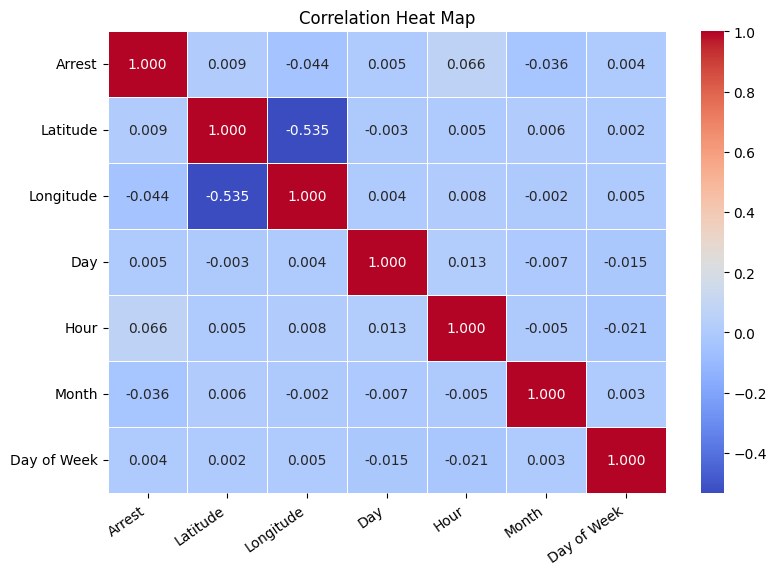

In [29]:
fig, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(data=correlation_test_df.corr(), annot=True, linewidth=0.5, fmt='.3f', cmap="coolwarm")

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Correlation Heat Map')

ax

In [30]:
association_test_df = df.drop(['Date', 'Latitude', 'Longitude'], axis=1)

association_test_list = []

for i in range(association_test_df.columns.size):
  association_test_list.append([])

  for j in range(association_test_df.columns.size):
    association_test_list[i].append(
      association(pd.crosstab(association_test_df.iloc[:, i], association_test_df.iloc[:, j]), method='cramer')
    )

<Axes: title={'center': 'Association Heat Map'}>

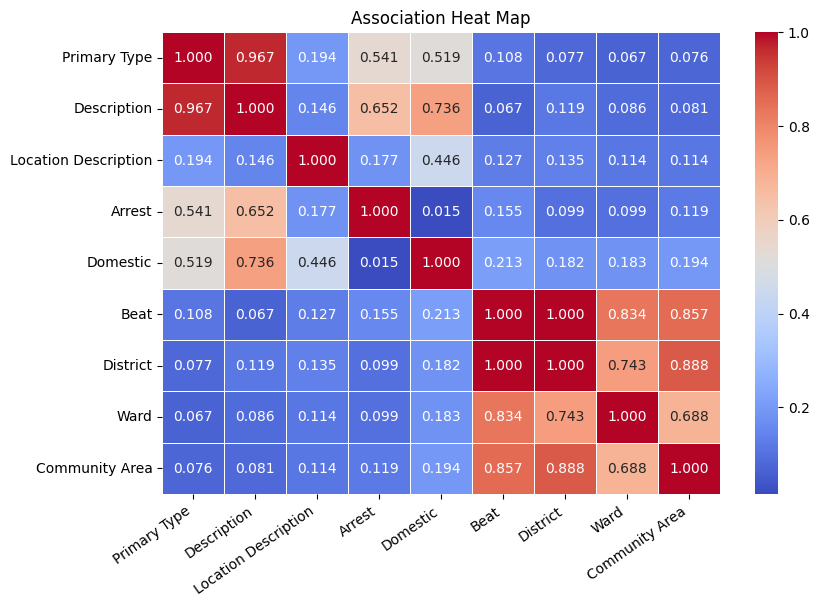

In [31]:
fig, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(data=association_test_list, annot=True, linewidth=0.5, fmt='.3f',
                 xticklabels=['Primary Type', 'Description', 'Location Description', 'Arrest',
                              'Domestic', 'Beat', 'District', 'Ward', 'Community Area'],
                 yticklabels=['Primary Type', 'Description', 'Location Description', 'Arrest',
                              'Domestic', 'Beat', 'District', 'Ward', 'Community Area'],
                 cmap="coolwarm")

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
ax.set_title('Association Heat Map')

ax

In [32]:
# Selected Features: ['Primary Type', 'Location Description', 'Arrest', 'Community Area']
 
df.drop(['Date', 'Description', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude', 'Longitude'], axis=1, inplace=True)

df['Community Area'] = df['Community Area'].astype(str)

df = pd.get_dummies(df)

In [33]:
train_features, test_features, train_label, test_label = train_test_split(df.drop('Arrest', axis=1),
                                                                          df['Arrest'], test_size=0.2, random_state=42)

In [12]:
ll = LogisticRegression(solver='sag').fit(train_features, train_label)

print(classification_report(test_label, ll.predict(test_features)))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95     41302
        True       0.74      0.37      0.50      5467

    accuracy                           0.91     46769
   macro avg       0.83      0.68      0.72     46769
weighted avg       0.90      0.91      0.90     46769



In [15]:
print(roc_auc_score(test_label, ll.predict_proba(test_features)[:, 1]))

0.8393228104900152


In [17]:
print(confusion_matrix(test_label, ll.predict(test_features)))

[[40596   706]
 [ 3434  2033]]


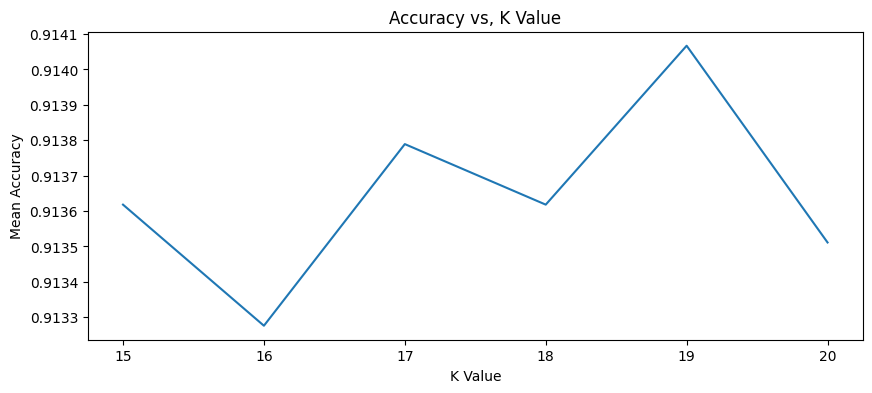

In [ ]:
mean_accs = []

for k in range(15, 21):
  model = KNeighborsClassifier(n_neighbors=k).fit(train_features, train_label)
  mean_accs.append(accuracy_score(test_label, model.predict(test_features)))

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(range(15, 21), mean_accs)
ax.set_xlabel('K Value')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy vs. K Value')

fig.savefig('test.png')

#k_classifier = KNeighborsClassifier(n_neighbors=19).fit(train_features, train_label)

#print("  K neighbors accuracy: " + str(accuracy_score(test_label, k_classifier.predict(test_features))))


Classification Accuracy:-
  Decision tree accuracy: 0.9107528491094529


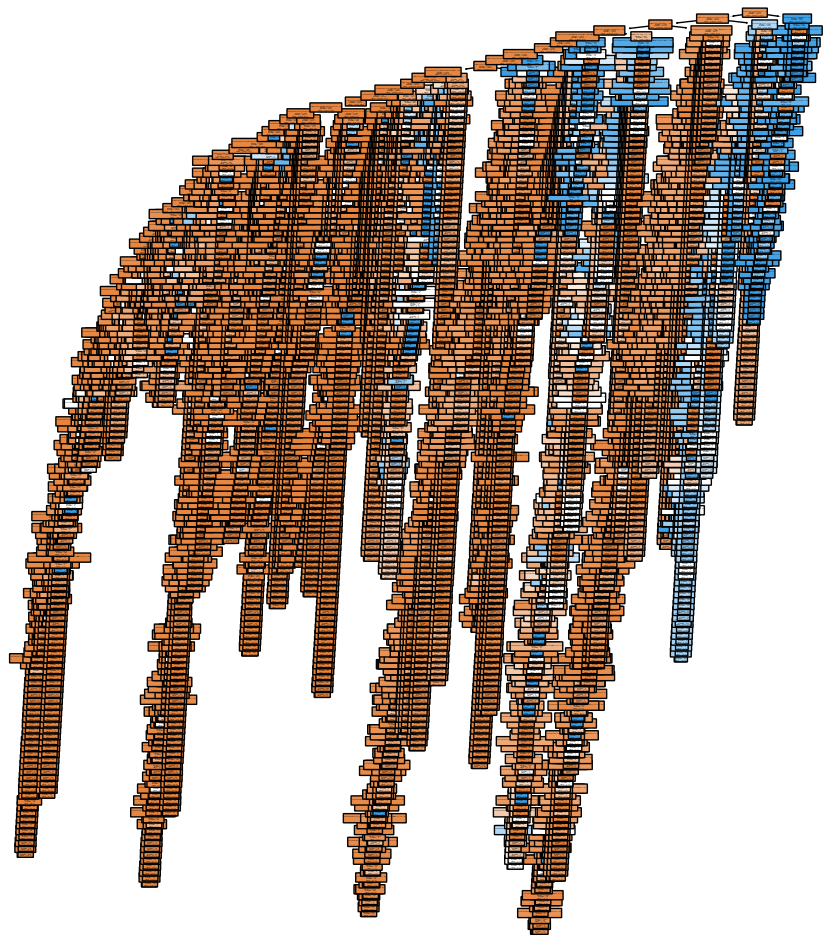

In [ ]:
tree_classifier = DecisionTreeClassifier(criterion='entropy').fit(train_features, train_label)

print("\nClassification Accuracy:-")

print("  Decision tree accuracy: " + str(accuracy_score(test_label, tree_classifier.predict(test_features))))

fig, ax = plt.subplots(figsize=(10, 12))

ax = plot_tree(tree_classifier, filled=True, feature_names=
               [f"{i}" for i in df2.drop('Arrest', axis=1).columns],
               class_names=['Not Arrested', 'Arrested'], rounded=True)

#ax.set_title('Decision Tree (ID3-like) Visualiztion')

fig.savefig('test1.png')

In [ ]:
svm_classifier = SVC()

svm_classifier.fit(train_features, train_label)

print("  SVM accuracy: " + str(accuracy_score(test_label, svm_classifier.predict(test_features))))